In [19]:
import pandas as pd
import os
print(os.getcwd())

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing / NLP
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

/Users/jasminebrunson/Downloads


In [18]:
df = pd.read_csv("exploitdb_full.csv")

In [14]:
df

,id,vendorId,type,bulletinFamily,title,description,published,modified,cve,cvss_score,...,reporter,references,lastseen,viewCount,enchant_score,enchant_uncertainty,enchant_vector,enchant_short_description,enchant_tags,sourceHref
0,EDB-ID:1,NaN,exploitdb,exploit,Microsoft IIS - WebDAV &#039;ntdll.dll&#039; R...,NaN,2003-03-23T00:00:00,2003-03-23T00:00:00,CVE-2003-0109,0.0,...,kralor,NaN,2025-01-21T21:12:18,204,7.4,1.9,NONE,Exploit for ntdll.dll using WebDAV for remote ...,ntdll.dll exploit \nwebdav \nremote shell \...,https://www.exploit-db.com/raw/1
1,EDB-ID:2,NaN,exploitdb,exploit,Microsoft IIS 5.0 - WebDAV Remote,NaN,2003-03-24T00:00:00,2003-03-24T00:00:00,CVE-2003-0109,7.5,...,RoMaNSoFt,NaN,2025-01-21T21:12:18,124,6.4,2.5,NONE,Exploiting IIS 5.0 WebDAV vulnerability throug...,"iis 5.0 vulnerability, webdav exploit, ntdll.d...",https://www.exploit-db.com/raw/2
2,EDB-ID:3,NaN,exploitdb,exploit,Linux Kernel 2.2.x/2.4.x (RedHat) - &#039;ptra...,NaN,2003-03-30T00:00:00,2003-03-30T00:00:00,CVE-2003-0127,0.0,...,Wojciech Purczynski,NaN,2025-01-21T21:12:18,192,7.4,1.9,NONE,Local privilege escalation vulnerability in Li...,"linux kernel, local privilege escalation, ptra...",https://www.exploit-db.com/raw/3
3,EDB-ID:4,NaN,exploitdb,exploit,Sun SUNWlldap Library Hostname - Local Buffer ...,NaN,2003-04-01T00:00:00,2003-04-01T00:00:00,NaN,0.0,...,Andi,NaN,2025-01-21T21:12:18,61,7.4,1.9,NONE,Local buffer overflow vulnerability exploit co...,"local buffer overflow, solaris systems, sun ld...",https://www.exploit-db.com/raw/4
4,EDB-ID:5,NaN,exploitdb,exploit,Microsoft Windows 2000/NT 4 - RPC Locator Serv...,NaN,2003-04-03T00:00:00,2003-04-03T00:00:00,CVE-2003-0003,0.0,...,Marcin Wolak,NaN,2025-01-21T21:12:18,178,7.4,1.9,NONE,Exploiting Microsoft RPC Locator Service buffe...,"microsoft windows 2000, rpc locator service, r...",https://www.exploit-db.com/raw/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47362,EDB-ID:52078,NaN,exploitdb,exploit,NoteMark &lt; 0.13.0 - Stored XSS,NaN,2024-08-28T00:00:00,2024-08-28T00:00:00,CVE-2024-41819,8.7,...,Alessio Romano (sfoffo),NaN,2025-01-16T05:33:56,80,7.4,1.9,NONE,Stored XSS in NoteMark version 0.13.0 and belo,"notemark, stored xss, exploit, alessio romano,...",https://www.exploit-db.com/raw/52078
47363,EDB-ID:52079,NaN,exploitdb,exploit,dizqueTV 1.5.3 - Remote Code Execution (RCE),NaN,2024-10-01T00:00:00,2024-10-01T00:00:00,NaN,0.0,...,Ahmed Said Saud Al-Busaidi,NaN,2024-10-01T17:29:39,168,7.4,1.9,NONE,dizqueTV 1.5.3 Remote Code Execution (RCE) - V...,"dizquetv 1.5.3, remote code execution, unautho...",https://www.exploit-db.com/raw/52079
47364,EDB-ID:52081,NaN,exploitdb,exploit,reNgine 2.2.0 - Command Injection (Authenticated),NaN,2024-10-01T00:00:00,2024-10-01T00:00:00,NaN,0.0,...,Caner Tercan,NaN,2024-10-01T17:29:39,178,7.4,1.9,NONE,reNgine 2.2.0 - Command Injection (Authenticat...,"rengine, command injection, authenticated, mac...",https://www.exploit-db.com/raw/52081
47365,EDB-ID:52080,NaN,exploitdb,exploit,openSIS 9.1 - SQLi (Authenticated),NaN,2024-10-01T00:00:00,2024-10-01T00:00:00,NaN,0.0,...,Devrim Dıragumandan,NaN,2024-10-01T17:29:39,203,7.4,1.9,NONE,"openSIS 9.1 SQL injection via ""X-Forwarded-For...","sql injection, opensis 9.1, x-forwarded-for, p...",https://www.exploit-db.com/raw/52080


In [16]:
df.describe()

,vendorId,cvss_score,references,viewCount,enchant_score,enchant_uncertainty
count,0.0,47367.000000,0.0,47367.000000,47367.000000,46117.000000
mean,NaN,0.999217,NaN,80.677687,7.326039,1.772604
std,NaN,2.696302,NaN,558.071202,0.915913,0.483971
min,NaN,0.000000,NaN,8.000000,0.000000,0.000000
25%,NaN,0.000000,NaN,20.000000,7.400000,1.900000
50%,NaN,0.000000,NaN,28.000000,7.400000,1.900000
75%,NaN,0.000000,NaN,42.000000,7.400000,1.900000
max,NaN,10.000000,NaN,62180.000000,10.000000,5.400000


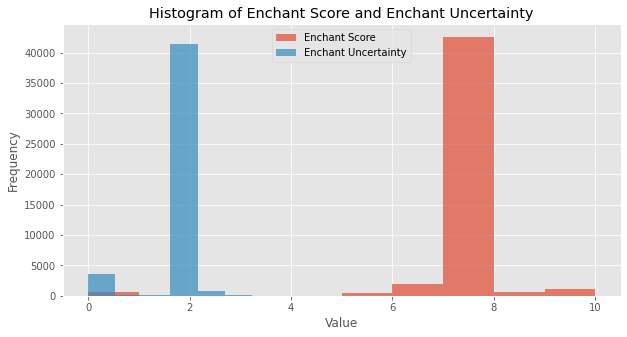

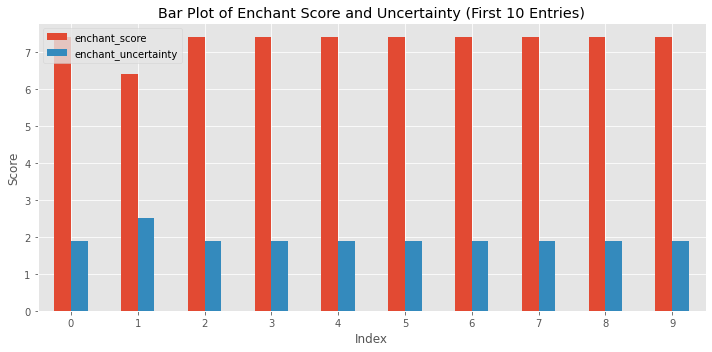

In [20]:
plt.style.use('ggplot')

# histogram for enchant_score and enchant_uncertainty
plt.figure(figsize=(10, 5))
plt.hist(df['enchant_score'], bins=10, alpha=0.7, label='Enchant Score')
plt.hist(df['enchant_uncertainty'], bins=10, alpha=0.7, label='Enchant Uncertainty')
plt.title('Histogram of Enchant Score and Enchant Uncertainty')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# bar plot for enchant_score and enchant_uncertainty (first 10 rows)
df_subset = df[['enchant_score', 'enchant_uncertainty']].head(10)

# bar plot with two metrics
df_subset.plot(kind='bar', figsize=(10, 5))
plt.title('Bar Plot of Enchant Score and Uncertainty (First 10 Entries)')
plt.xlabel('Index')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()

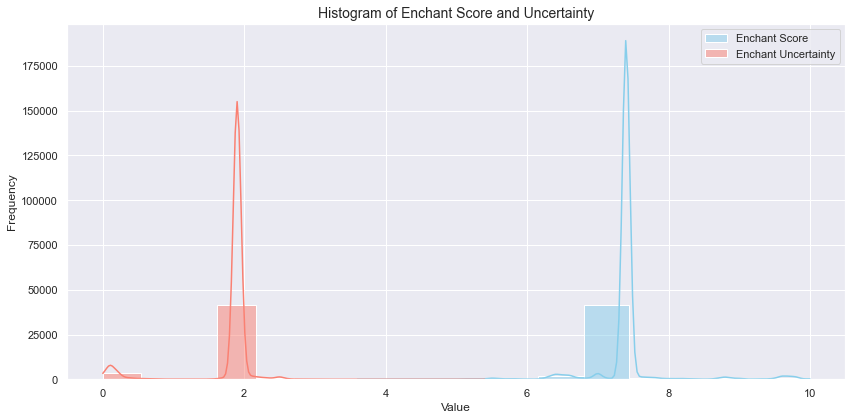

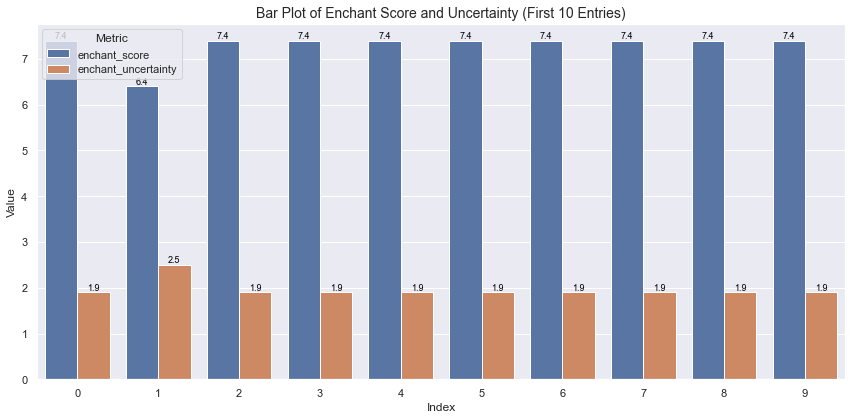

In [24]:
sns.set(style="darkgrid")

# drop NaN rows to clean dataset
df_clean = df[['enchant_score', 'enchant_uncertainty']].dropna()

# ----------------------------
# Histogram with Seaborn
# ----------------------------
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['enchant_score'], color='skyblue', label='Enchant Score', kde=True, bins=10)
sns.histplot(df_clean['enchant_uncertainty'], color='salmon', label='Enchant Uncertainty', kde=True, bins=10)
plt.title('Histogram of Enchant Score and Uncertainty', fontsize=14)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# Bar Plot for First 10 Entries
# ----------------------------
df_bar = df_clean.head(10).copy()
df_bar.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=df_bar.melt(id_vars='index', 
                                        value_vars=['enchant_score', 'enchant_uncertainty']),
                       x='index', y='value', hue='variable')

# annotations
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom',
                      fontsize=9, color='black')

plt.title('Bar Plot of Enchant Score and Uncertainty (First 10 Entries)', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

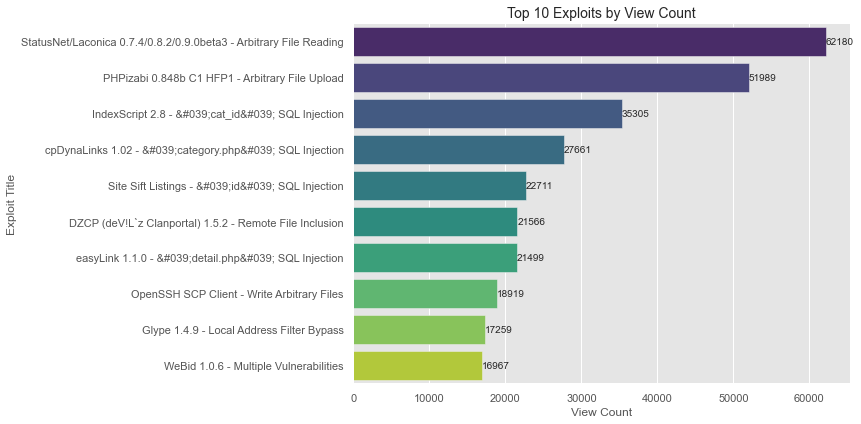

In [23]:
plt.style.use('ggplot')
df_top_views = df[['viewCount', 'title']].dropna().sort_values(by='viewCount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=df_top_views, x='viewCount', y='title', palette='viridis')

for p in bar_plot.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

plt.title('Top 10 Exploits by View Count', fontsize=14)
plt.xlabel('View Count')
plt.ylabel('Exploit Title')
plt.tight_layout()
plt.show()